In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import os
import warnings

(891, 12)
(714, 11)


<ipython-input-17-e309b9d777a8>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dat[dat["Survived"]==1]["Age"],shade=True, color="blue", label="Survived", ax=a)
<ipython-input-17-e309b9d777a8>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dat[dat["Survived"]==0]["Age"],shade=True, color="green", label="Did not survive", ax=a)


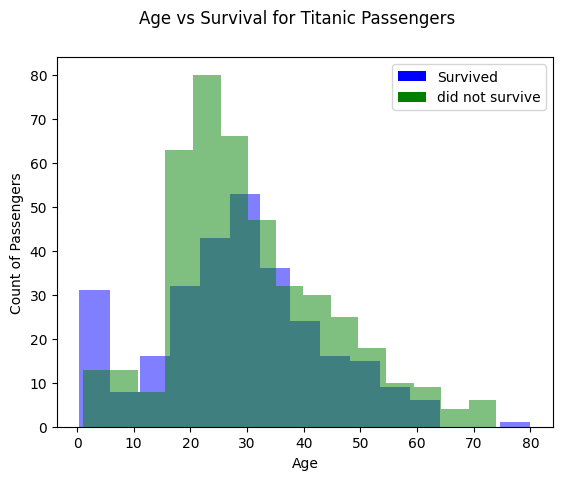

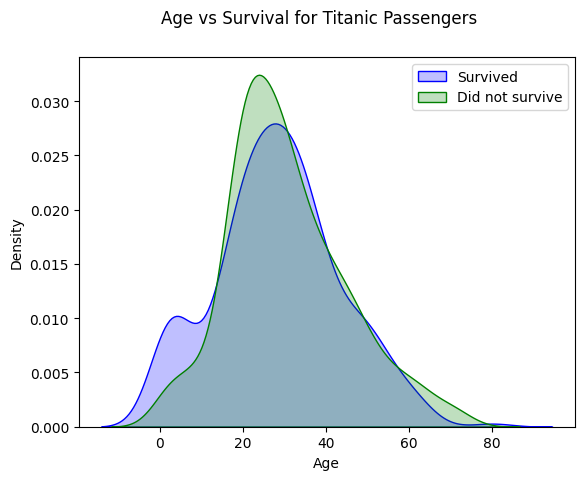

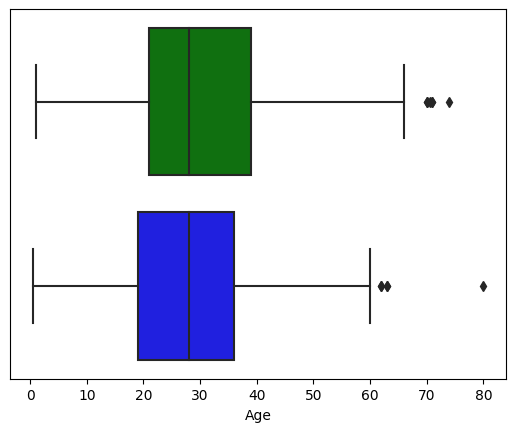

In [17]:
# Numeric vs Categorical EDA
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#Data Sourcing
dat = pd.read_csv('/content/titanic.csv')
print(dat.shape)

#Passenger ID isnt useful for analysis
dat.drop(labels = "PassengerId", axis= 1,inplace =True)
#We use age as one of the main examples, drop rows that miss age values
dat.dropna(subset=["Age"], inplace=True)

print(dat.shape)
fig, ax= plt.subplots()
ax.hist(dat[dat["Survived"]==1]["Age"], bins=15, alpha = 0.5,color="blue", label="survived")
ax.hist(dat[dat["Survived"]==0]["Age"], bins=15, alpha = 0.5,color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of Passengers")

fig.suptitle("Age vs Survival for Titanic Passengers")
ax.legend()

f,a = plt.subplots()
sns.kdeplot(dat[dat["Survived"]==1]["Age"],shade=True, color="blue", label="Survived", ax=a)
sns.kdeplot(dat[dat["Survived"]==0]["Age"],shade=True, color="green", label="Did not survive", ax=a)
a.set_xlabel("Age")
a.set_ylabel("Density")

f.suptitle("Age vs Survival for Titanic Passengers")
a.legend()

figure, axis =plt.subplots()
sns.boxplot(x="Age", y="Survived", data = dat, orient="h",palette ={1:"blue",0:"green"},ax= axis)
axis.get_yaxis().set_visible(False)
fig.suptitle("Age vs Survival for Titanic Passengers")

color_patches= [
    Patch(facecolor="blue", label="Survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles= color_patches)

TypeError: ignored

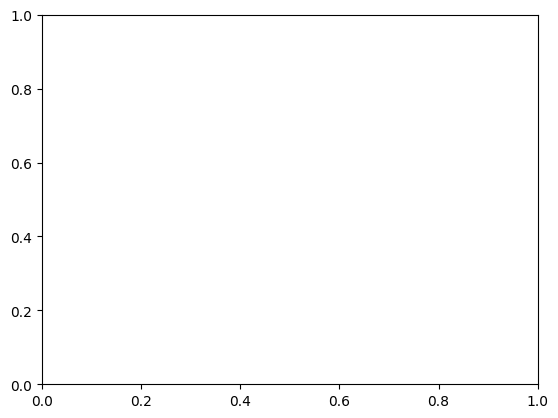

In [25]:
#categorical vs categorical EDA
df =  pd.read_csv('/content/titanic.csv')
fig,ax = plt.subplots()
sns.catplot("Pclass", hue = "Survived", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(2) #catplot creates an extra figure we dont need.
ax.set_xlabel("Passenger Class")
color_patches=[
    Patch(facecolor = "blue", label ="survival"),
    Patch(facecolor = "green", label = "did not survive")
]
ax.legend(handles = color_patches)